## Challenge: Advanced Logistic Regression

Author: Jackie Zuker

Using a datasest with a binary outcome, create Vanilla, LASSO, and Ridge Logistic Regression models. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("/Users/jacquelynzuker/Desktop/DataScienceBootcamp/HR_comma_sep.csv")
data = pd.get_dummies(data)

y = data.Work_accident
del data["Work_accident"]
X = data

In [3]:
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score

log_regr = linear_model.LogisticRegressionCV()
log_regr.fit(X, y)

# Inspect the results.
print('\nCoefficients: \n', log_regr.coef_)
print('\nIntercept: \n', log_regr.intercept_)
print('\nR-squared:')
print(log_regr.score(X, y))

log_regr_score = cross_val_score(log_regr, X, y, cv = 10)
print("\nCross-Validated R-Squared of Vanilla Regression Model: %0.2f (+/- %0.2f)" 
      % (log_regr_score.mean(), log_regr_score.std() * 2))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



Coefficients: 
 [[ 0.00736296 -0.00034525 -0.00035517 -0.00055615  0.00230041 -0.03343171
   0.00293464 -0.0013201   0.00197058 -0.00146663 -0.00176264  0.00113527
   0.00136051  0.00014075 -0.00111453  0.00221389 -0.00114369  0.0011809
  -0.00151159  0.0003441 ]]

Intercept: 
 [-1.66849049]

R-squared:
0.855390359357

Cross-Validated R-Squared of Vanilla Regression Model: 0.86 (+/- 0.00)


In [4]:
# LASSO Logistic Regression with an L1 penalty
from sklearn.linear_model import LogisticRegression

lasso = LogisticRegression(penalty = "l1", solver="liblinear")
lasso.fit(X, y)

lasso_score = cross_val_score(lasso, X, y, cv=10)
print("Cross-Validated R-Squared of Lasso Regression Model: %0.2f (+/- %0.2f)" 
      % (lasso_score.mean(), lasso_score.std() * 2))

Cross-Validated R-Squared of Lasso Regression Model: 0.86 (+/- 0.00)


In [5]:
from sklearn.linear_model import RidgeClassifier

ridgelm = linear_model.RidgeClassifier(alpha=0)
ridgelm_score = cross_val_score(ridgelm, X, y, cv=10)
print("Cross-Validated R-Squared of Ridge Regression Model: %0.2f (+/- %0.2f)" 
      % (ridgelm_score.mean(), ridgelm_score.std() * 2))

Cross-Validated R-Squared of Ridge Regression Model: 0.86 (+/- 0.00)


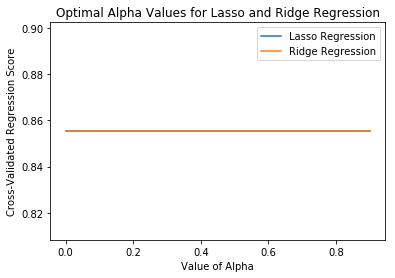

In [7]:
interval = 0.1
alpha_range = np.arange(0,1,interval)

# search for an optimal correlation value for Linear Models
lasso_scores = []
ridge_scores = []
for alphaVal in alpha_range: 
    lasso = LogisticRegression(penalty = "l1", solver="liblinear")
    lasso_score = cross_val_score(lasso, X, y, cv=10)
    lasso_scores.append(lasso_score.mean())
    
    ridgeBig = linear_model.RidgeClassifier(alpha=alphaVal, fit_intercept=False)
    ridge_score = cross_val_score(ridgeBig, X, y, cv=10)
    ridge_scores.append(ridge_score.mean())
    
# plot the performance of Lasso and Ridge Regression against the value of alpha
plt.plot(alpha_range, lasso_scores, label = "Lasso Regression")
plt.plot(alpha_range, ridge_scores, label = "Ridge Regression")
plt.xlabel("Value of Alpha")
plt.ylabel("Cross-Validated Regression Score")
plt.legend()
plt.title("Optimal Alpha Values for Lasso and Ridge Regression")
plt.show()